# 1. Imports

`imports`, you've seen this before!

In [90]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopy
from geopy.geocoders import Nominatim
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [63]:
%matplotlib inline

# 2. Read in the csv file

In [ ]:
if os.path.isfile("international_air_traffic_data_set.csv"):
    filepath = "international_air_traffic_data_set.csv"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/dataset/d9fbffaa-836f-4f52-80e8-324249ff269f/resource/ebcafd83-9514-4f72-a995-fe7ee90cb9da/download/city_pairs.csv"
    print("loading from the internet")

international_air_traffic_data_set = pd.read_csv(filepath)
print("done")

Read the data frame as df

In [ ]:
df = pd.read_csv("international_air_traffic_data_set.csv")
df.head()

# Info about the data frame

looking at the info for the code - are there any null values? what are the objects type?

In [ ]:
df.info()

Tells you how many items are in each YEAR

In [ ]:
df.groupby("Year").size()

Tells you how many items are in each DOMESTIC PORT

Highest to lowest

In [ ]:
df.AustralianPort.value_counts(dropna=False)

Tells you how many items are in each FOREIGN PORT

Highest to lowest

In [ ]:
df.ForeignPort.value_counts(dropna=False)

Tells you how many items are in each FOREIGN PORT

Alphabetical

In [ ]:
df.groupby("ForeignPort").size()

This Function looks up a country in the data frame

In [ ]:
df.loc[df['Country'] == "Japan"]

This Function looks up a country in the data frame

In [ ]:
Look_up_a_Country = df[((df.Country == "Japan"))]
Look_up_a_Country

Goes through all the rows in foreign port and prints them

In [ ]:
for index, row in df.iterrows():
    print(index, row['ForeignPort'])

items that have a space in them

In [ ]:
df.loc[df["ForeignPort"].str.contains(" ")]

# for items that dont have a space in them
# df.loc[~df["ForeignPort"].str.contains(" ")] 

# Useful Groupings

Groups the data by DOMESTIC Airport

In [ ]:
for group_key, group_value in df.groupby("AustralianPort"):
    print(group_key)
    print(group_value)

Groups the data frame by year

In [ ]:
for group_key, group_value in df.groupby("Year"):
    print(group_key)
    print(group_value)

Creates a list of the FOREIGN PORTS

In [ ]:
list(df.groupby("ForeignPort"))

Shows the first and last year that an airport had been used

In [ ]:
df.groupby("AustralianPort").agg({"Year" : ["count", "min", "max"]})

Shows the min and max of each country and how many times it appears

In [ ]:
df.groupby(['Country']).Passengers_Total.agg(["count", min, max])

Shows the first and last year that a country had been travelled to

In [ ]:
df.groupby("ForeignPort").agg({"Year" : ["count", "min", "max"]})

SPECIFIC AIRPORT, MONTH AND YEAR

Shows all the travel in January 2016 from Sydney

In [ ]:
a = df[(df.Year == 2016) & ((df.AustralianPort == "Sydney")) & ((df.Month_num == 1))]
a

Groups the data frame by year and australian airport

then it tells you how many times the foriegn airport appears in that year

In [301]:
df.groupby(["Year", "AustralianPort", "ForeignPort"]).size()

Year  AustralianPort      ForeignPort
1985  Adelaide            Abu Dhabi       8
                          Amsterdam       3
                          Auckland       12
                          Bahrain        12
                          Bangkok         1
                                         ..
2021  Sydney              Vancouver       4
                          Wellington      1
                          Xiamen          4
      Toowoomba Wellcamp  Hong Kong       4
                          Singapore       4
Length: 8683, dtype: int64

Just shows a DATAFRAME with relevant infomration on PASSENGERS

In [ ]:
df[["Year", "AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]

SHOWS cells with BOTH "USA" and "SYDNEY" in it

boolean indexing 

Just shows a DATAFRAME with relevant infomration on PASSENGERS

In [ ]:
dfa = df[["Year", "AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]
Sydney = dfa[(dfa.AustralianPort == "Sydney") & (dfa.Country == "USA")]
Sydney.sort_values(by=["Passengers_Total", "AustralianPort"])
Sydney.tail()

# 3. Get long and lat

This goes to the internet and grabs the long and lat for the cities

Grabs the unique items from the column we just made

In [ ]:
#import all these - in the link it shows you how to install them
import pandas as pd
import geopy
from geopy.geocoders import Nominatim

#I don't really understand code but this line makes it all work
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

#This is just me reading in my data frame
df = pd.read_csv("international_air_traffic_data_set.csv")

# This concatinates the columns for city name and country - e.g. Auckland, New Zealand

df["full_address"] = df.ForeignPort + ", " + df.Country

# My data frame has over 82000 rows, so I only want to look for the unique cities because there are only 203
# therefore less time waiting for all the data to load
unique_ports = df.full_address.unique()

# here im creating "buckets" or "empty lists" to fill in the data that comes back from the api
lat = []
lon = []
ports = []
locations = []

# This loop goes through each city in the "unique cities" list and get the geocode data from the internet
for port in unique_ports:
    try:
        location = geolocator.geocode(port)
        lat.append(location.latitude)
        lon.append(location.longitude)
        locations.append(location)
        ports.append(port)
        print(location.longitude, location.latitude)
    except:
        # i put in an except loop because sometimes the api doesnt recognise a city name
        # if it return no value then it prints the name of the city it couldnt find
        # im having some trouble at the moment with cases its getting confused somewhere along the way
        # It doesnt like "NewYork" it likes "New York" it has to have a space - somewhere my code is removing the space
        if location == None:
            # by printing "port" you can see which cities it cant find
            print(port)
# this bit takes those lists from above and puts them in a dictionary
di = {"port":ports, "locations":locations, "latitude":lat, "longitude":lon}
dz = {"latitude":lat, "longitude":lon}
# this converts the dictionary into a data frame
# port_df is the data frame that gets merged to the bigger frame later
port_df = pd.DataFrame(di)
# long_lat is a data frame that just has long and lat data
long_lat = pd.DataFrame(dz)

Merge the new data frame with the long/lat of the unique cities

In [261]:
# I need to match the "port" column (the one we just geocoded and made) 
# with the "full_address" column we just created as a new column in the original data frame
df_long_lat = pd.merge(df, port_df, left_on='full_address', right_on='port')
df_long_lat.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),...,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,full_address,port,locations,latitude,longitude,geometry
0,31048,Adelaide,Auckland,New Zealand,1513.0,42.167,0.311,985.0,18.704,0.924,...,60.871,1.235,1985,1,"Auckland, New Zealand","Auckland, New Zealand","(Auckland, Waitematā, Auckland, 1010, New Zeal...",-36.852095,174.76318,POINT (174.76318 -36.85209)
1,31048,Brisbane,Auckland,New Zealand,7157.0,223.258,0.671,5652.0,33.032,3.218,...,256.290,3.889,1985,1,"Auckland, New Zealand","Auckland, New Zealand","(Auckland, Waitematā, Auckland, 1010, New Zeal...",-36.852095,174.76318,POINT (174.76318 -36.85209)
2,31048,Darwin,Auckland,New Zealand,379.0,5.529,0.000,108.0,0.209,0.031,...,5.738,0.031,1985,1,"Auckland, New Zealand","Auckland, New Zealand","(Auckland, Waitematā, Auckland, 1010, New Zeal...",-36.852095,174.76318,POINT (174.76318 -36.85209)
3,31048,Melbourne,Auckland,New Zealand,6039.0,200.015,0.799,5328.0,155.065,3.726,...,355.080,4.525,1985,1,"Auckland, New Zealand","Auckland, New Zealand","(Auckland, Waitematā, Auckland, 1010, New Zeal...",-36.852095,174.76318,POINT (174.76318 -36.85209)
4,31048,Norfolk Island,Auckland,New Zealand,367.0,9.708,0.288,546.0,0.120,0.122,...,9.828,0.410,1985,1,"Auckland, New Zealand","Auckland, New Zealand","(Auckland, Waitematā, Auckland, 1010, New Zeal...",-36.852095,174.76318,POINT (174.76318 -36.85209)


Saves this to a new csv file

Its called "modified"

In [84]:
df_long_lat.to_csv('modified.csv', index=False)

# 4. Graphs

Shows the amount of passengers from each country

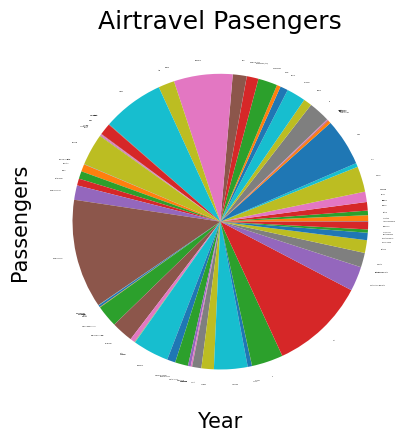

In [179]:
pd.a = df.groupby("Country").size()
a.sort_values(ascending=False)
a.plot.pie()
plt.title("Airtravel Pasengers", fontsize=18)
plt.grid(False)
plt.show()

pie chart of travel distribution in 1985

<AxesSubplot:ylabel='None'>

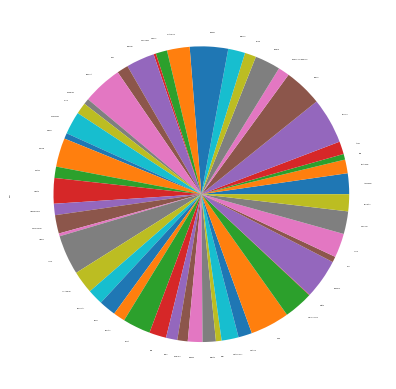

In [310]:
# Creates a data frame with just the relevant columns
dfpie = df_long_lat[["Year", "ForeignPort"]]
# just shows data in the column where year == 1985
dataforpie = dfpie[(df_long_lat.Year == 1985)]
# groups the data by the size of the port
e = dataforpie.groupby("ForeignPort").size()
e.plot.pie()

Plots the Passengers

Shows the increase in passengers and then decrease when COVID hit

In [ ]:
pass_total = df[["Year","Passengers_Total"]].groupby("Year").sum()

plt.rcdefaults()
plt.plot(pass_total, "x-")
plt.title("Airtravel Pasengers", fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Passengers', fontsize=10)
plt.grid(True)
plt.show()

Most popular domestic airport

In [ ]:
pd.most_pop_dom_port = df.AustralianPort.value_counts(dropna=False)
most_pop_dom_port.plot.bar()
plt.title("Most Popular Domestic Airports", fontsize=18)
plt.xlabel('Airport', fontsize=15)
plt.ylabel('Frequency of Appearance', fontsize=15)
plt.show()

# 5. Maps

loads the world map and cites dataset

In [ ]:
 world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
 cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

Shows the world map
no data

In [ ]:
world.plot()

This code maps the long and lat data onto a world map

C:\Users\Anthony\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(199.50494402860429, 0.5, 'Latitude')

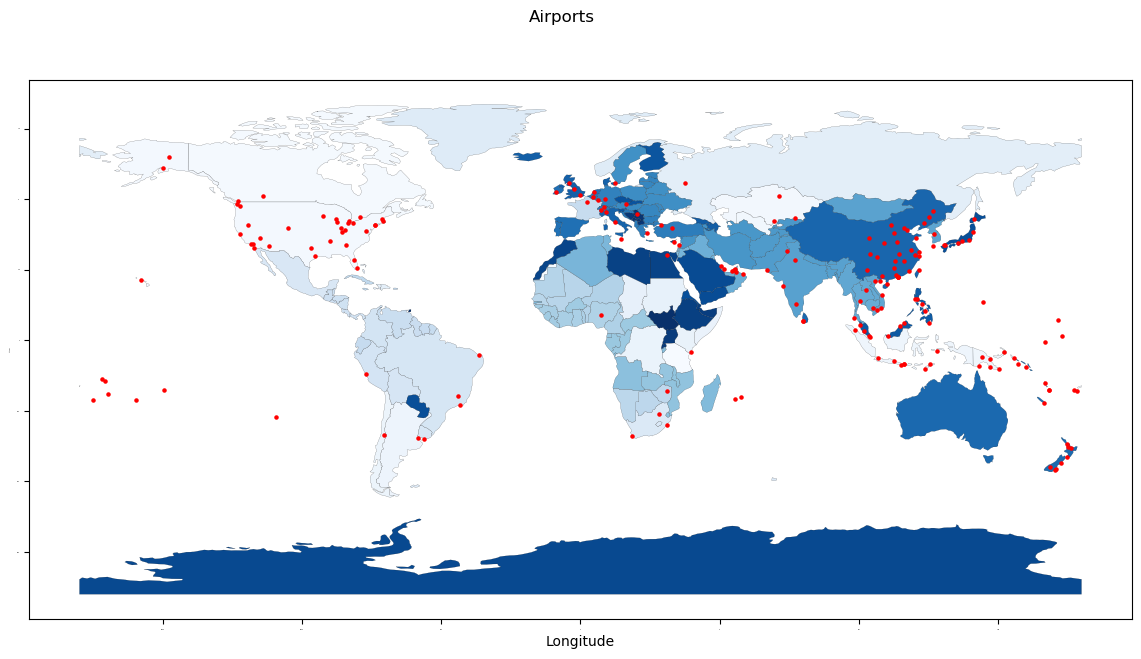

In [276]:
# port_df = data frame with long/lat + name + location - only has unique cities
# long_lat = data frame with just unique long/lat
# df_long_lat = big data frame now containing the long and lat - takes longer if its used
# the data frame with the long and lat coordinates
data = port_df
# tells python the coordinate system
crs={'init':'epsg:4326'}
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

#cmaps is the colour map - can check matplotlib for all the colour maps 

geodata.plot(ax=ax, color='red', markersize=5)  
fig.suptitle('Airports', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Destinations in 1985

Text(195.01216455101834, 0.5, 'Latitude')

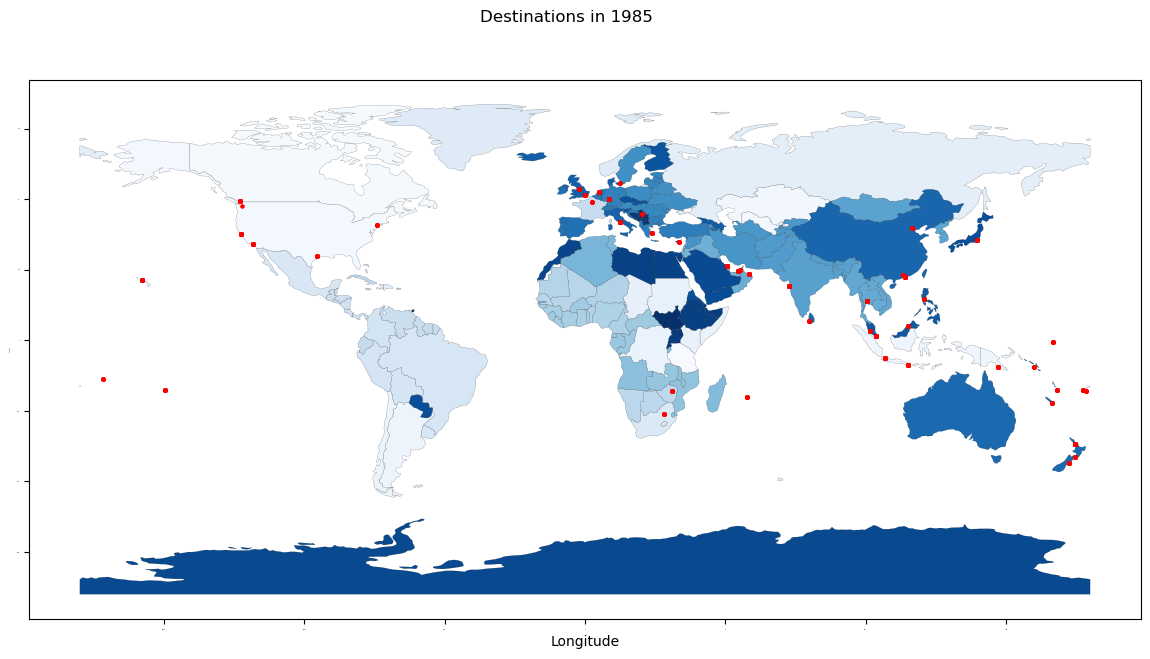

In [290]:
# port_df = data frame with long/lat + name + location - only has unique cities
# long_lat = data frame with just unique long/lat
# df_long_lat = big data frame now containing the long and lat - takes longer if its used
# the data frame with the long and lat coordinates 
data = df_long_lat[(df_long_lat.Year == 1985)]

# tells python the coordinate system
crs ={'init':'epsg:4326'}
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

#cmaps is the colour map - can check matplotlib for all the colour maps 

geodata.plot(ax=ax, color='red', markersize=5)  
fig.suptitle('Destinations in 1985', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Destinations in 2019

C:\Users\Anthony\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(196.8717417803292, 0.5, 'Latitude')

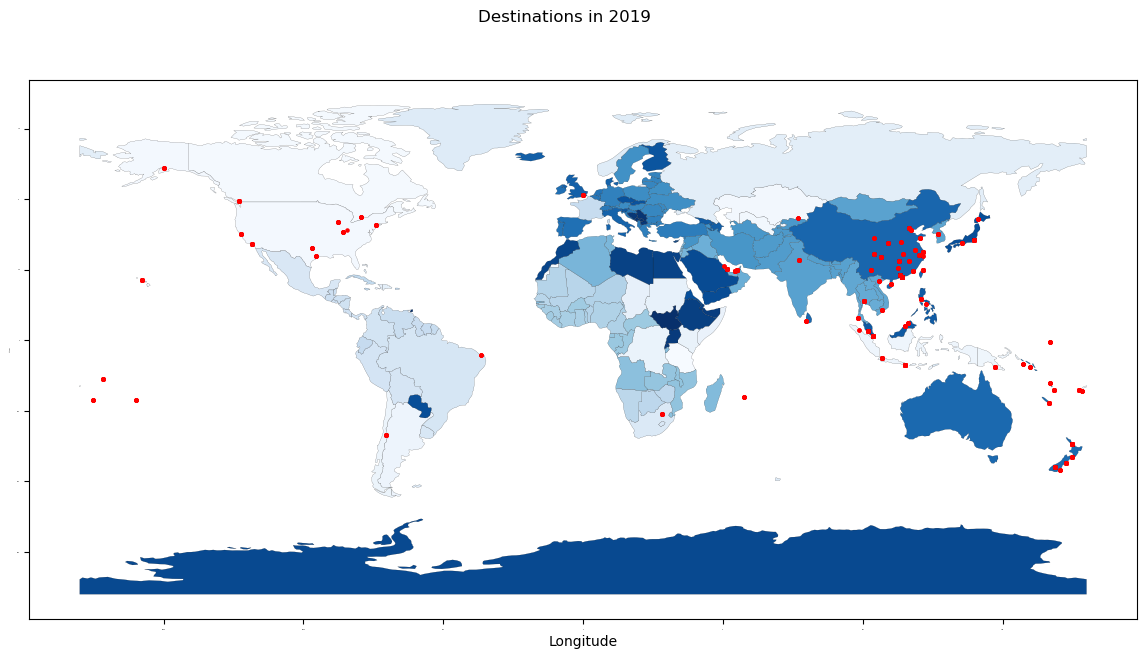

In [292]:
# port_df = data frame with long/lat + name + location - only has unique cities
# long_lat = data frame with just unique long/lat
# df_long_lat = big data frame now containing the long and lat - takes longer if its used
# the data frame with the long and lat coordinates 
data = df_long_lat[(df_long_lat.Year == 2019)]

# tells python the coordinate system
crs ={'init':'epsg:4326'} 
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

#cmaps is the colour map - can check matplotlib for all the colour maps 

geodata.plot(ax=ax, color='red', markersize=5)  
fig.suptitle('Destinations in 2019', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')